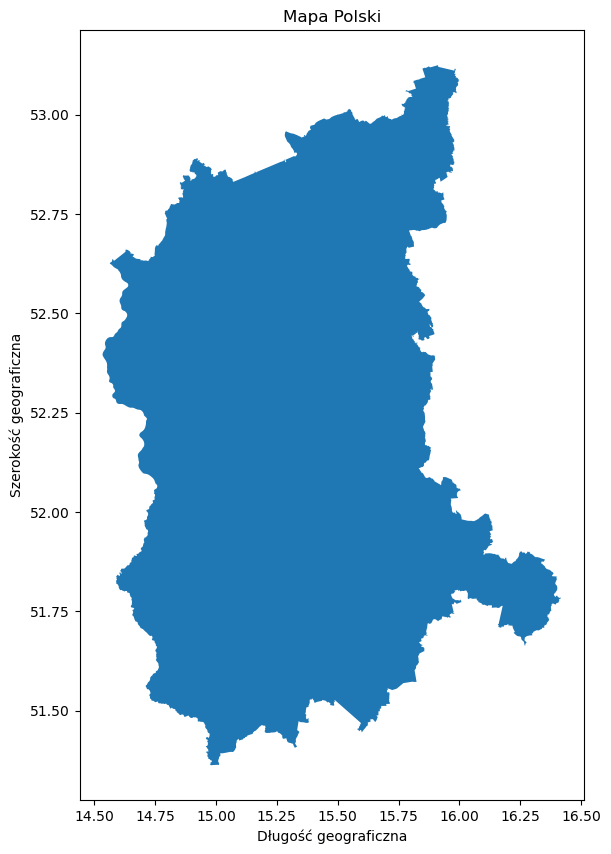

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from shapely.geometry import Point
from haversine import haversine, Unit
from matplotlib.colors import Normalize
from matplotlib import cm
import skgstat as skg

# Ścieżka do folderu zawierającego pliki SHP
folder_path = "Lubuskie"

# Lista do przechowywania obiektów GeoDataFrame
gdfs = []
i = 1

# Iteracja przez pliki w folderze
for filename in os.listdir(folder_path):
    if filename.endswith(".shp"):
        # Wczytaj plik SHP
        filepath = os.path.join(folder_path, filename)
        gdf = gpd.read_file(filepath)
        
        # Sprawdź czy geometria to POLYGON
        if 'Polygon' in gdf.geom_type.unique():
            # Dodaj do listy tylko jeśli to POLYGON
            gdfs.append(gdf)

# Połącz wszystkie GeoDataFrame w jeden
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
from pyproj import CRS, Transformer

# Zdefiniuj obecny układ współrzędnych
obecny_uklad = CRS(merged_gdf.crs)

# Zdefiniuj układ docelowy (WGS84)
uklad_docelowy = CRS("EPSG:4326")

# Utwórz transformator między układami współrzędnych
transformer = Transformer.from_crs(obecny_uklad, uklad_docelowy)

# Przelicz współrzędne dla wszystkich geometrii w GeoDataFrame
merged_gdf['geometry'] = merged_gdf['geometry'].to_crs(uklad_docelowy)

# Zapisz przeliczone dane do nowego pliku SHP
plik_wgs84 = "Lubuskie/Lubuskie_wgs84.shp"
merged_gdf.to_file(plik_wgs84)
# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax)  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# Dodaj tytuł i etykiety
plt.title("Mapa Polski")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświetl mapę
plt.show()

In [97]:
# # Zakres współrzędnych z geometrii poligonu
# min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# # Inicjalizacja pustej listy na punkty
# points_inside_polygon = []

# # Ilość punktów do wygenerowania
# num_points = 5

# # Wygeneruj 5 losowych punktów x, y wewnątrz poligonu
# #np.random.seed(42)

# while len(points_inside_polygon) < num_points:
#     # Wygeneruj 1 losowy punkt x, y wewnątrz poligonu
#     random_x = np.random.uniform(min_x, max_x, 1)[0]
#     random_y = np.random.uniform(min_y, max_y, 1)[0]

#     # Sprawdź, czy punkt znajduje się wewnątrz poligonu
#     point = Point(random_x, random_y)
#     if point.within(merged_gdf.unary_union):
#         points_inside_polygon.append(point)

# # Stwórz GeoDataFrame dla wylosowanych punktów
# random_points = gpd.GeoDataFrame(geometry=points_inside_polygon, crs=merged_gdf.crs)

# # Stwórz mapę
# fig, ax = plt.subplots(figsize=(10, 10))
# merged_gdf.plot(ax=ax)  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# xGA = 14.724068286506554
# yGA = 51.94894077373222
# Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
# Lub_Gub.plot(ax=ax, color='yellow', label='Gubin ul. Generała Andersa')

# xKW = 16.317500
# yKW = 51.799722
# Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
# Lub_Wsch.plot(ax=ax, color='red', label='Wschowa ul. Kazimierza Wielkiego')

# xZS = 15.127808
# yZS = 51.642656
# Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
# Lub_Szyman.plot(ax=ax, color='green', label='Zary ul. Szymanowskiego')

# xKS = 15.229592971164104
# yKS = 52.736798841119096
# Lub_Gorz = gpd.GeoDataFrame(geometry=[Point(xKS, yKS)], crs=uklad_docelowy)
# Lub_Gorz.plot(ax=ax, color='green', label='Gorzow ul. Kosynierow')

# xMK = 15.56561304016405
# yMK = 52.443823725447785
# Lub_Miedz = gpd.GeoDataFrame(geometry=[Point(xMK, yMK)], crs=uklad_docelowy)
# Lub_Miedz.plot(ax=ax, color='green', label='Miedzyrzecz ul. KEN')

# xZG = 15.518495934448795
# yZG = 51.94051852537971
# Lub_Ziel = gpd.GeoDataFrame(geometry=[Point(xZG, yZG)], crs=uklad_docelowy)
# Lub_Ziel.plot(ax=ax, color='green', label='Zielona Gora ul. Krotka')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='black', marker='o', label='Losowe punkty')

# # Dodaj legendę w prawym górnym rogu
# ax.legend(loc='upper right')
# # Dodaj tytuł i etykiety
# plt.title("Mapa Wojewodztwa Lubuskiego")
# plt.xlabel("Długość geograficzna")
# plt.ylabel("Szerokość geograficzna")

# # Wyświet mapę
# plt.show()

In [16]:
# def oblicz_odleglosc(punkt_a, punkt_b):
#     wspolrzedne_a = (punkt_a.y, punkt_a.x)
#     wspolrzedne_b = (punkt_b.y, punkt_b.x)

#     odleglosc = haversine(wspolrzedne_a, wspolrzedne_b, unit=Unit.KILOMETERS)

#     return odleglosc

# # Oblicz odległości dla każdego punktu
# for idx, punkt in enumerate(points_inside_polygon):
#     odleglosci_Lub_Gub = oblicz_odleglosc(punkt, Point(xGA, yGA))
#     odleglosci_Lub_Wsch = oblicz_odleglosc(punkt, Point(xKW, yKW))
#     odleglosci_Lub_Szyman = oblicz_odleglosc(punkt, Point(xZS, yZS))
    
#     print(f"Odległość dla Punktu {idx + 1} od Gubin ul. Generała Andersa: {odleglosci_Lub_Gub:.2f} km")
#     print(f"Odległość dla Punktu {idx + 1} od Wschowa ul. Kazimierza Wielkiego: {odleglosci_Lub_Wsch:.2f} km")
#     print(f"Odległość dla Punktu {idx + 1} od Zary ul. Szymanowskiego: {odleglosci_Lub_Szyman:.2f} km")

In [17]:
# data = []

# # Oblicz odległości dla każdego punktu
# for idx, punkt in enumerate(points_inside_polygon):
#     odleglosci_Lub_Gub = oblicz_odleglosc(punkt, Point(xGA, yGA))
#     odleglosci_Lub_Wsch = oblicz_odleglosc(punkt, Point(xKW, yKW))
#     odleglosci_Lub_Szyman = oblicz_odleglosc(punkt, Point(xZS, yZS))
    
#     # Dodaj dane do listy
#     data.append({
#         "Nazwa Punktu": f"Punkt {idx + 1}",
#         "Odległość od Gubin": odleglosci_Lub_Gub,
#         "Odległość od Wschowa": odleglosci_Lub_Wsch,
#         "Odległość od Zary": odleglosci_Lub_Szyman
#     })

# # Utwórz DataFrame
# df = pd.DataFrame(data)

# # Wyświetl DataFrame
# print(df)


In [98]:
# Wczytaj pierwszy plik CSV
plik1 = "Data/o3.csv"
df_o3 = pd.read_csv(plik1)
df_o3 = df_o3[(df_o3['Rok'] == 2021) & (df_o3['Czas uśredniania'] == 1)]

# Wczytaj drugi plik CSV
plik2 = "Data/pm25.csv"
df_pm25 = pd.read_csv(plik2)
df_pm25 = df_pm25[(df_pm25['Rok'] == 2021) & (df_pm25['Czas uśredniania'] == 1)]
wartosc_Gubin_pm25=df_pm25['Średnia'].values[0]
wartosc_Wschowa_pm25=df_pm25['Średnia'].values[1]
wartosc_Zary_pm25=df_pm25['Średnia'].values[2]
wartosc_Miedz_pm25=25.8
wartosc_Gorzow_pm25=23.1
wartosc_ZG_pm25=18.2
wartosc_Wschowa_o3=df_o3['Średnia'].values[0]
wartosc_Zary_o3=df_o3['Średnia'].values[1]

In [99]:
punkty_pm25 = {
    'Nazwa': ['Gubin_pm25','Wschowa_pm25', 'Zary_pm25', 'Miedz_pm25', 'Gorzow_pm25', 'ZG_pm25'],
    'Long': [14.724068286506554, 16.317500, 15.127808, 15.56561304016405, 15.229592971164104, 15.518495934448795],
    'Latt': [51.94894077373222, 51.799722, 51.642656, 52.443823725447785, 52.736798841119096, 51.94051852537971],
    'Wartosc': [wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25]
}

punkty_pm25 = pd.DataFrame(punkty_pm25)

# Wyświetlenie ramki danych
punkty_pm25

,Nazwa,Long,Latt,Wartosc
0,Gubin_pm25,14.724068,51.948941,16.775606
1,Wschowa_pm25,16.317500,51.799722,20.094807
2,Zary_pm25,15.127808,51.642656,14.367280
3,Miedz_pm25,15.565613,52.443824,25.800000
4,Gorzow_pm25,15.229593,52.736799,23.100000
5,ZG_pm25,15.518496,51.940519,18.200000


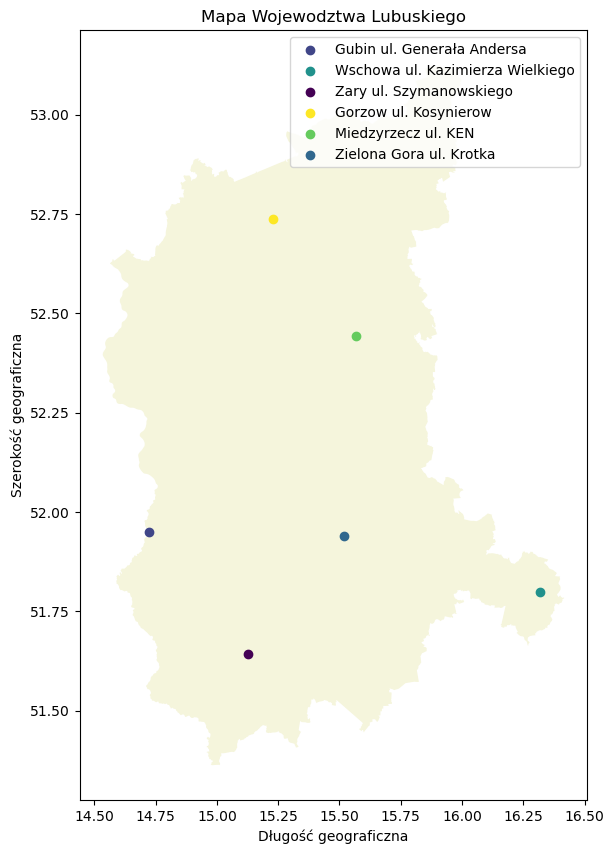

In [100]:
# Zakres współrzędnych z geometrii poligonu
# min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# # Inicjalizacja pustej listy na punkty
# points_inside_polygon = []

# # Ilość punktów do wygenerowania
# num_points = 5

# # Wygeneruj 5 losowych punktów x, y wewnątrz poligonu
# #np.random.seed(42)

# while len(points_inside_polygon) < num_points:
#     # Wygeneruj 1 losowy punkt x, y wewnątrz poligonu
#     random_x = np.random.uniform(min_x, max_x, 1)[0]
#     random_y = np.random.uniform(min_y, max_y, 1)[0]

#     # Sprawdź, czy punkt znajduje się wewnątrz poligonu
#     point = Point(random_x, random_y)
#     if point.within(merged_gdf.unary_union):
#         points_inside_polygon.append(point)

# # Stwórz GeoDataFrame dla wylosowanych punktów
# random_points = gpd.GeoDataFrame(geometry=points_inside_polygon, crs=merged_gdf.crs)

# Znormalizuj wartości do zakresu 0-1
norm_pm25 = Normalize(vmin=min(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25),
                  vmax=max(wartosc_Gubin_pm25, wartosc_Wschowa_pm25, wartosc_Zary_pm25, wartosc_Miedz_pm25, wartosc_Gorzow_pm25, wartosc_ZG_pm25))

# Wybierz mapę kolorów
cmap = plt.get_cmap('viridis')

# Przekształć wartości na intensywność koloru
kolor_Gubin = cmap(norm_pm25(wartosc_Gubin_pm25))
kolor_Wschowa = cmap(norm_pm25(wartosc_Wschowa_pm25))
kolor_Zary = cmap(norm_pm25(wartosc_Zary_pm25))
kolor_Gorz = cmap(norm_pm25(wartosc_Miedz_pm25))
kolor_Miedz = cmap(norm_pm25(wartosc_Gorzow_pm25))
kolor_ZG = cmap(norm_pm25(wartosc_ZG_pm25))

#####################DLA o3 ODKOPMENTOWAĆ I ZAKOMENTOWAĆ RESZTĘ##################################################

# # Znormalizuj wartości do zakresu 0-1
# norm_o3 = Normalize(vmin=min(wartosc_Wschowa_o3, wartosc_Zary_o3),
#                  vmax=max(wartosc_Wschowa_o3, wartosc_Zary_o3))

# # Wybierz mapę kolorów
# cmap = plt.get_cmap('viridis')

# # Przekształć wartości na intensywność koloru
# kolor_Gubin = cmap(norm_o3(wartosc_Gubin_o3))
# kolor_Wschowa = cmap(norm_o3(wartosc_Wschowa_o3))
# kolor_Zary = cmap(norm_o3(wartosc_Zary_o3))

# # Stwórz mapę
# fig, ax = plt.subplots(figsize=(10, 10))
# merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

# xGA = 14.724068286506554
# yGA = 51.94894077373222
# Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
# Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

# xKW = 16.317500
# yKW = 51.799722
# Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
# Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

# xZS = 15.127808
# yZS = 51.642656
# Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
# Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='white', marker='o', label='Losowe punkty')

# # Dodaj legendę w prawym górnym rogu
# ax.legend(loc='upper right')
# # Dodaj tytuł i etykiety
# plt.title("Mapa Wojewodztwa Lubuskiego")
# plt.xlabel("Długość geograficzna")
# plt.ylabel("Szerokość geograficzna")

# # Wyświet mapę
# plt.show()

################################################################################################################

# Stwórz mapę
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax, color='beige')  # Zmieniaj kolor, itp., zgodnie z Twoimi potrzebami

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

xKS = 15.229592971164104
yKS = 52.736798841119096
Lub_Gorz = gpd.GeoDataFrame(geometry=[Point(xKS, yKS)], crs=uklad_docelowy)
Lub_Gorz.plot(ax=ax, color=kolor_Gorz, label='Gorzow ul. Kosynierow')

xMK = 15.56561304016405
yMK = 52.443823725447785
Lub_Miedz = gpd.GeoDataFrame(geometry=[Point(xMK, yMK)], crs=uklad_docelowy)
Lub_Miedz.plot(ax=ax, color=kolor_Miedz, label='Miedzyrzecz ul. KEN')

xZG = 15.518495934448795
yZG = 51.94051852537971
Lub_Ziel = gpd.GeoDataFrame(geometry=[Point(xZG, yZG)], crs=uklad_docelowy)
Lub_Ziel.plot(ax=ax, color=kolor_ZG, label='Zielona Gora ul. Krotka')

# # Dodaj punkty Żółte z etykietami
# for idx, punkt in enumerate(random_points.geometry):
#     ax.annotate(f'Punkt {idx + 1}', (punkt.x, punkt.y), textcoords="offset points", xytext=(0, 5), ha='center')

# # Dodaj punkty Żółte
# random_points.plot(ax=ax, color='black', marker='o', label='Losowe punkty')

# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper right')
# Dodaj tytuł i etykiety
plt.title("Mapa Wojewodztwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświet mapę
plt.show()

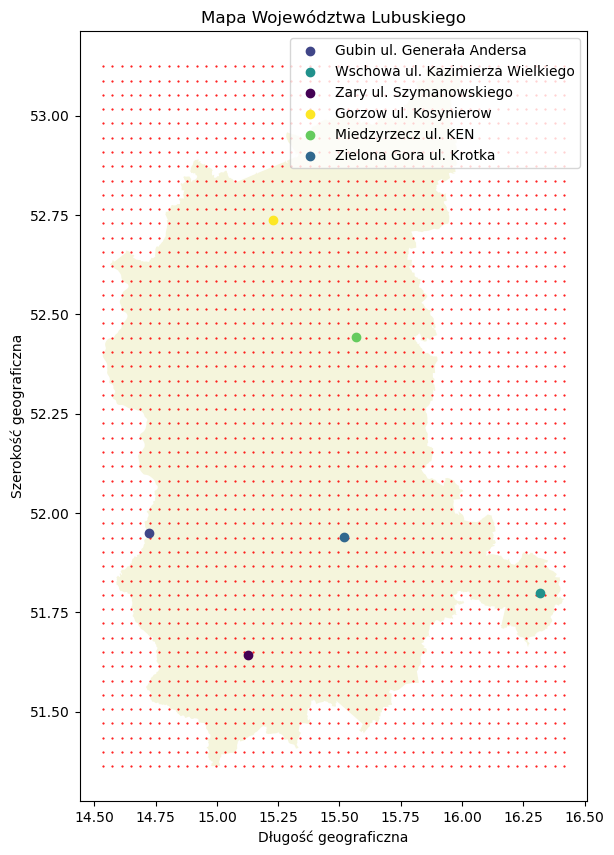

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax, color='beige')

# Granice mapy merged_gdf
min_x, min_y, max_x, max_y = merged_gdf.total_bounds

# Liczba punktów wzdłuż X i Y
num_points_X = 50  # Dostosuj ilość punktów, jeśli to konieczne
num_points_Y = 50

# Tworzenie równomiernie rozłożonych punktów w obrębie granic mapy
X_points = np.linspace(min_x, max_x, num_points_X)
Y_points = np.linspace(min_y, max_y, num_points_Y)

# Tworzenie siatki punktów (X, Y)
grid_points = pd.DataFrame([(x, y) for x in X_points for y in Y_points], columns=['Long', 'Latt'])

# Wyświetlenie uzyskanej siatki punktów
plt.scatter(grid_points['Long'], grid_points['Latt'], 0.3, color='red')

xGA = 14.724068286506554
yGA = 51.94894077373222
Lub_Gub = gpd.GeoDataFrame(geometry=[Point(xGA, yGA)], crs=uklad_docelowy)
Lub_Gub.plot(ax=ax, color=kolor_Gubin, label='Gubin ul. Generała Andersa')

xKW = 16.317500
yKW = 51.799722
Lub_Wsch = gpd.GeoDataFrame(geometry=[Point(xKW, yKW)], crs=uklad_docelowy)
Lub_Wsch.plot(ax=ax, color=kolor_Wschowa, label='Wschowa ul. Kazimierza Wielkiego')

xZS = 15.127808
yZS = 51.642656
Lub_Szyman = gpd.GeoDataFrame(geometry=[Point(xZS, yZS)], crs=uklad_docelowy)
Lub_Szyman.plot(ax=ax, color=kolor_Zary, label='Zary ul. Szymanowskiego')

xKS = 15.229592971164104
yKS = 52.736798841119096
Lub_Gorz = gpd.GeoDataFrame(geometry=[Point(xKS, yKS)], crs=uklad_docelowy)
Lub_Gorz.plot(ax=ax, color=kolor_Gorz, label='Gorzow ul. Kosynierow')

xMK = 15.56561304016405
yMK = 52.443823725447785
Lub_Miedz = gpd.GeoDataFrame(geometry=[Point(xMK, yMK)], crs=uklad_docelowy)
Lub_Miedz.plot(ax=ax, color=kolor_Miedz, label='Miedzyrzecz ul. KEN')

xZG = 15.518495934448795
yZG = 51.94051852537971
Lub_Ziel = gpd.GeoDataFrame(geometry=[Point(xZG, yZG)], crs=uklad_docelowy)
Lub_Ziel.plot(ax=ax, color=kolor_ZG, label='Zielona Gora ul. Krotka')


# Dodaj legendę w prawym górnym rogu
ax.legend(loc='upper right')

# Dodaj tytuł i etykiety osi
plt.title("Mapa Województwa Lubuskiego")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")

# Wyświetl mapę
plt.show()

In [29]:
p1Variogram = skg.Variogram(punkty_pm25[['Long', 'Latt']].values, punkty_pm25.Wartosc.values, n_lags=20)

/Users/misiek/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 0.98, 'Wartosc')

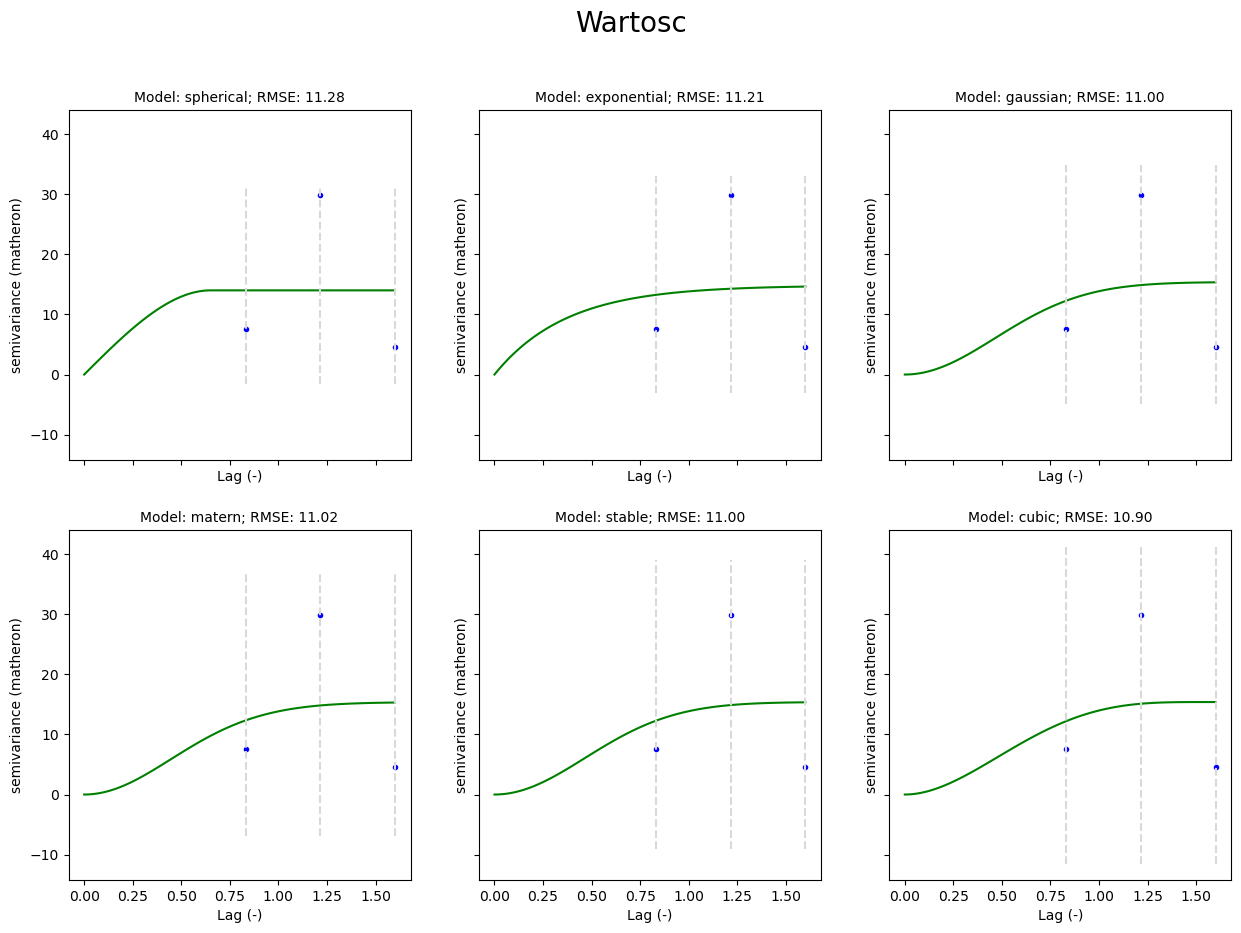

In [35]:
p1Variogram.bin_func = 'scott'
fig, _a = plt.subplots(2,3, figsize=(15, 10), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    p1Variogram.model = model
    p1Variogram.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, p1Variogram.rmse),size=10)
fig.suptitle("Wartosc",size=20)

In [36]:
def interpolate(V, ax,cmap):
    ok_V1 = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')
    prediction_points = grid_points[['Long', 'Latt']].values

    predicted_V1 = ok_V1.transform(prediction_points).reshape(50, 50)
    predicted_V1_rotated = np.rot90(predicted_V1, k=1)  # 90 stopni w lewo
    predicted_V1_rotated_flipped = np.flipud(predicted_V1_rotated)

    art = ax.matshow(predicted_V1_rotated_flipped, origin='lower', vmin=V.values.min(), vmax=V.values.max(),cmap=cmap)
    ax.set_title('%s model' % V.model.__name__)
    plt.colorbar(art, ax=ax)

    return predicted_V1_rotated_flipped

/Users/misiek/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/Users/misiek/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


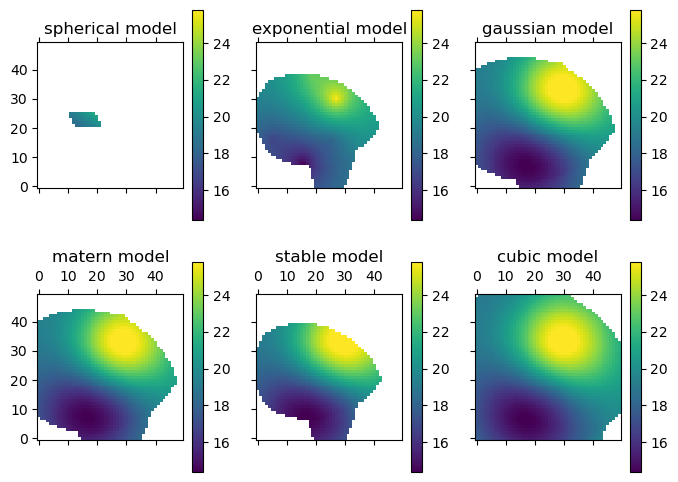

In [37]:
fields = []
fig, _a = plt.subplots(2,3, figsize=(8, 6), sharex=True, sharey=True)
axes = _a.flatten()
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    p1Variogram.model = model
    fields.append(interpolate(p1Variogram, axes[i],'viridis'))

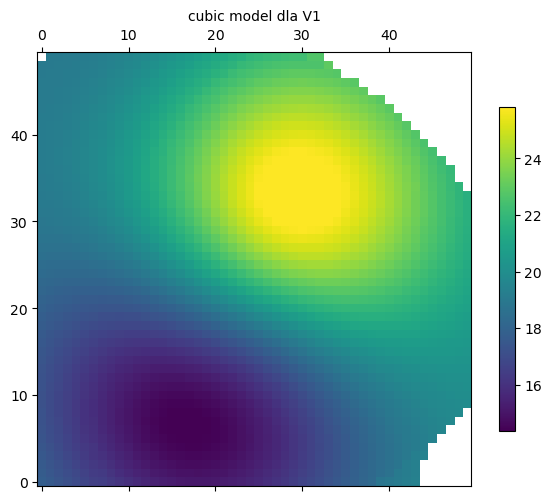

In [40]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))

p1Variogram.model = 'cubic'

ok_V1 = skg.OrdinaryKriging(p1Variogram, min_points=5, max_points=15, mode='exact')
prediction_points = grid_points[['Long', 'Latt']].values

predicted_V1 = ok_V1.transform(prediction_points).reshape(50, 50)
# predicted_V1 = pd.DataFrame(predicted_V1.reshape(100,100))
predicted_V1_rotated = np.rot90(predicted_V1, k=1)  # 90 stopni w lewo
predicted_V1_rotated_flipped = np.flipud(predicted_V1_rotated)

art = ax.matshow(predicted_V1_rotated_flipped, origin='lower', vmin=p1Variogram.values.min(), vmax=p1Variogram.values.max())
ax.set_title('%s model dla V1' % p1Variogram.model.__name__,size=10)
plt.colorbar(art, ax=ax,shrink=0.6)

In [45]:
new = pd.DataFrame(predicted_V1_rotated)

new.columns = grid_points.iloc[:,0].unique()
new.index = sorted(grid_points.iloc[:, 1].unique(), reverse=True)

predicted_V1 = pd.DataFrame(new.stack(dropna=False)).reset_index()
predicted_V1.columns = ['Y','X','V1']

In [46]:
predicted_V1

,Y,X,V1
0,53.123972,14.534207,NaN
1,53.123972,14.572628,19.091964
2,53.123972,14.611049,19.094149
3,53.123972,14.649470,19.107544
4,53.123972,14.687891,19.133167
...,...,...,...
2495,51.363189,16.263156,NaN
2496,51.363189,16.301577,NaN
2497,51.363189,16.339998,NaN
2498,51.363189,16.378419,NaN


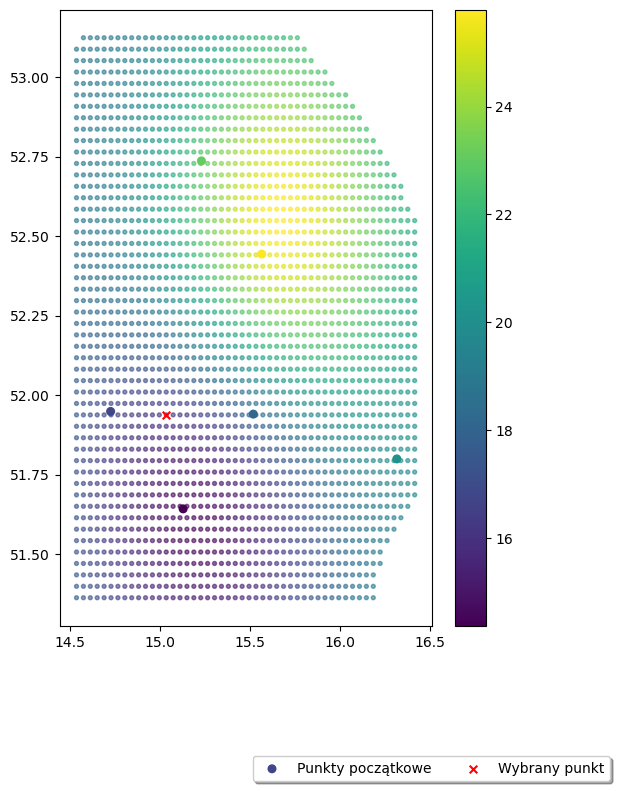

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8), sharex=True, sharey=True)

# Wykres dla Predicted_V1
scatter_plot_V1 = ax.scatter(predicted_V1['X'],predicted_V1['Y'],  s=8, c=predicted_V1['V1'], alpha=0.6)
actual_data_V1 = ax.scatter(punkty_pm25.iloc[:, 1], punkty_pm25.iloc[:, 2], c=punkty_pm25.Wartosc, s=30, label='Punkty początkowe')
ax.scatter(Long, Latt, c='red', s=30, marker='x', label='Wybrany punkt')
plt.colorbar(actual_data_V1,ax=ax)

# # fig.text(0.5, 0.04, 'Easting X', ha='center', va='center')
# # fig.text(0.06, 0.5, 'Northing Y', ha='center', va='center', rotation='vertical')

ax.legend(loc='upper left', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

plt.show()

In [82]:
grid_points.loc[666]

Long    15.033681
Latt    51.938139
Name: 666, dtype: float64

In [71]:
predicted_V1

,Y,X,V1
0,53.123972,14.534207,NaN
1,53.123972,14.572628,19.091964
2,53.123972,14.611049,19.094149
3,53.123972,14.649470,19.107544
4,53.123972,14.687891,19.133167
...,...,...,...
2495,51.363189,16.263156,NaN
2496,51.363189,16.301577,NaN
2497,51.363189,16.339998,NaN
2498,51.363189,16.378419,NaN


In [83]:
Long=15.033681
Latt=51.938139

In [84]:
tolerance = 0.001  # Ustawienie tolerancji dla wartości liczbowych

dupa = predicted_V1[(predicted_V1['X'].between(Long - tolerance, Long + tolerance)) & 
          (predicted_V1['Y'].between(Latt - tolerance, Latt + tolerance))]

In [85]:
dupa

,Y,X,V1
1663,51.938139,15.033681,16.188569
